# Multiclass - Exercise $3$

Create a dataset with three classes, each class has N = $917$ objects, represented by two variables X1 and X2 according to the following requirements (seed = $15$):

The feature $X^1$ is distributed as follows:
- $X^1_1$ is a uniform distribution from -1 to 5
- $X^1_2$ is a uniform distribution from 5 to 8
- $X^1_3$ is a uniform distribution from -10 to 4

The feature $X^2$ is distributed as follows:
- $X^2_1$ is a uniform distribution from 4 to 9
- $X^2_2$ is a uniform distribution from 1 to 5
- $X^2_3$ is a uniform distribution from -10 to 4

Each class has its label $Y$ that can be $1$, $2$ or $3$

In [1]:
import numpy as np

# set seed
np.random.seed(15)

# number of samples
N = 917

# class 1
X1_1 = np.random.uniform(low=-1, high=5, size=N)
X1_2 = np.random.uniform(low=4, high=9, size=N)

# class 2
X2_1 = np.random.uniform(low=4, high=8, size=N)
X2_2 = np.random.uniform(low=1, high=5, size=N)

# class 3
X3_1 = np.random.uniform(low=-10, high=4, size=N)
X3_2 = np.random.uniform(low=-10, high=4, size=N)

# labels
Y1 = np.ones(N)
Y2 = np.ones(N) * 2
Y3 = np.ones(N) * 3

Plot the generated dataset using the <tt>scatter</tt> function

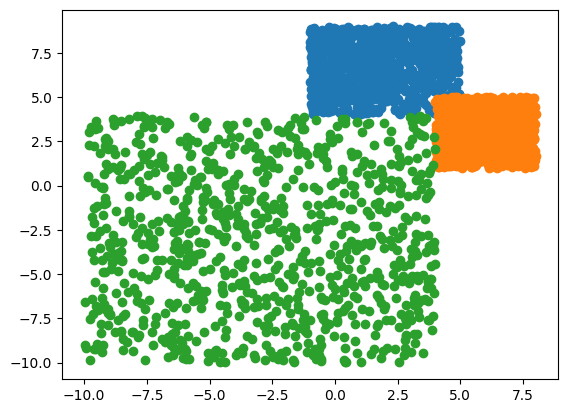

In [2]:
import matplotlib.pyplot as plt

# display class 1
plt.scatter(X1_1, X1_2)

# display class 2
plt.scatter(X2_1, X2_2)

# display class 3
plt.scatter(X3_1, X3_2)

Create a matrix of points $X$ (each row is an object) and a vector $Y$ of labels. Remember that we need the coordinate $X_0$ for the bias term (all ones).

In [3]:
# bias term
X0 = np.ones(N * 3)

# feature X1
X1 = np.concatenate((X1_1, X2_1, X3_1))

# feature X2
X2 = np.concatenate((X1_2, X2_2, X3_2))

# dataset matrix
X = np.stack((X0, X1, X2), axis=1)

# vector of labels
y =  np.concatenate((Y1, Y2, Y3))

We want to train a binary classifier for class $2$. To this purpose, create a vector of labels <tt>y_class</tt> that contains 1 for each object belonging to the class under study (positive class) and -1 for all the other objects.

In [4]:
# choosen class
positive_class = 2

# new vector of binary labels
y_class = - np.ones_like(y)

# masking for binary labels
y_class[ y == positive_class ] = 1

Using <tt>plt.scatter</tt> plot the new binary classification problem

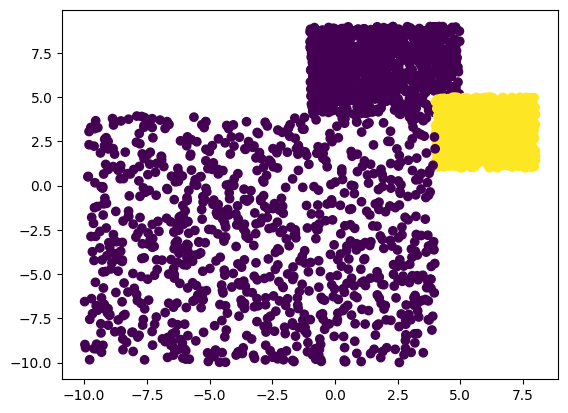

In [5]:
plt.scatter(X[:, 1], X[:, 2], c=y_class)

## Error function

Write the function <tt>sse(X, Y, w)</tt> that takes the data matrix $X$, the labels $Y$, and the vector of parameters $w$ and computes sum of squared errors defined as $\sum\left( Y - X\cdot w \right)^2$

In [6]:
def sse(X : np.matrix, y : np.array, w : np.array) -> float:
    return np.sum( np.square( y - np.dot(X, w) ) )

## Learning

After defining the vector of weights as a uniform distribution within the range \[-1. 1\], start training the model by using $\eta = 9\cdot 10^{-5}$ and the maximum epochs to $50$. 

For each epoch save the sum of squared errors in the <tt>sse_epoch</tt> vector and the number of objects misclassified in the vector <tt>errors_epoch</tt>.


In [7]:
# weight vector
w = np.random.uniform(low=-1, high=1, size=X.shape[1])

# learing rate
eta = 9e-5

# epochs
max_epochs = 50
current_epoch = 0

# errors
sse_epoch = np.zeros(max_epochs)
errors_epoch = np.zeros(max_epochs)

# training
while current_epoch < max_epochs:

    # store partial sum of squared errors
    sse_epoch[current_epoch] = sse(X, y, w)

    for i in range(y_class.size):
        
        output = np.sign( np.dot( X[i, :], w ) )

        if output * y_class[i] < 0:
            w += eta * y_class[i] * X[i, :]
            errors_epoch[current_epoch] += 1

    current_epoch += 1

Display raw the plots containing the solution found by the PLA

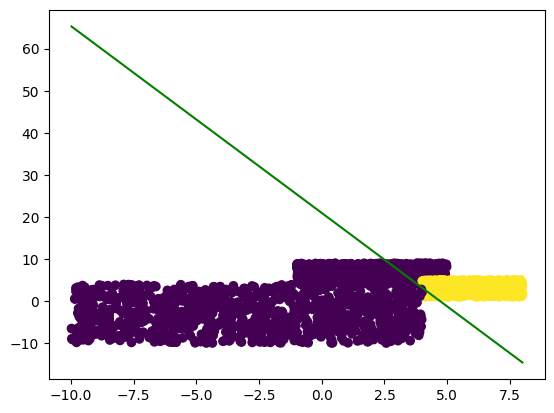

In [8]:
# display datapoints
plt.scatter(X[:, 1], X[:, 2], c=y_class)

# display line
plt.plot([ np.min((X1_1, X2_1, X3_1)), np.max((X1_1, X2_1, X3_1)) ],
         [ - np.min((X1_1, X2_1, X3_1)) * w[1]/w[2] - w[0]/w[2], - np.max((X1_1, X2_1, X3_1)) * w[1]/w[2] - w[0]/w[2] ],
         color="green")

Now display the two error plots using the two error vectors

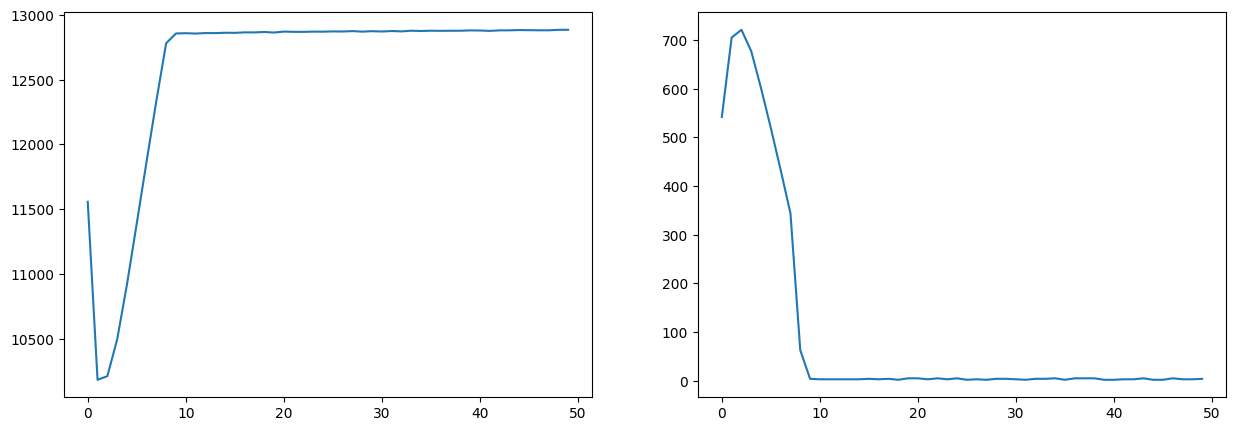

In [9]:
# create subplot
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# plot sse
axs[0].plot(range(sse_epoch.size), sse_epoch)

# plot errors
axs[1].plot(range(errors_epoch.size), errors_epoch)